# Create The Plots for the Paper

In [2]:
import numpy as np
import torch
from main import Args
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size': 18})
import pickle
color_list = sns.color_palette('muted')

/home/lars/miniconda3/lib/python3.9/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/lars/miniconda3/lib/python3.9/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in

In [19]:
model_names = ['online_nmnist', 'shd_4layer_withckpts_noaugment', 'shd_3layer_stacked']
save_names = ['nmnist', 'shd_feedforward', 'shd_stacked']
args = []
results = []
device = 'cpu'
for model_name in model_names:
    with open('models/' + model_name + '_args.pkl', 'rb') as f:
        args.append(pickle.load(f))
    with open('final_results/' + model_name + '_accuracies.pkl', 'rb') as f:
        results.append(pickle.load(f))

Test Accuracies: tensor([0.8563, 0.9528, 0.9543, 0.9535]) nmnist_accuracies
torch.Size([4]) torch.Size([4])


Test Accuracies: tensor([0.4525, 0.7031, 0.7297, 0.7153, 0.6989]) shd_feedforward_accuracies
torch.Size([5]) torch.Size([5])
Test Accuracies: tensor([0.4526, 0.6684, 0.7361, 0.7510, 0.7460]) shd_feedforward_cat_accuracies
torch.Size([5]) torch.Size([5])
Test Accuracies: tensor([0.2889, 0.5685, 0.6453, 0.6820, 0.6665]) shd_feedforward_closed_accuracies
torch.Size([5]) torch.Size([5])
Test Accuracies: tensor([0.2889, 0.5579, 0.6767, 0.7420, 0.7588]) shd_feedforward_closed_cat_accuracies
torch.Size([5]) torch.Size([5])
Test Accuracies: tensor([0.4482, 0.7109, 0.7251, 0.6983]) shd_stacked_accuracies
torch.Size([4]) torch.Size([4])
Test Accuracies: tensor([0.4580, 0.6595, 0.7109, 0.7182]) shd_stacked_cat_accuracies
torch.Size([4]) torch.Size([4])
Test Accuracies: tensor([0.2889, 0.6148, 0.7089, 0.7019]) shd_stacked_closed_accuracies
torch.Size([4]) torch.Size([4])
Test Accuracies: tensor([0.2889, 0.6193, 0.7359, 0.7557]) shd_stacked_closed_cat_accuracies
torch.Size([4]) torch.Size([4])


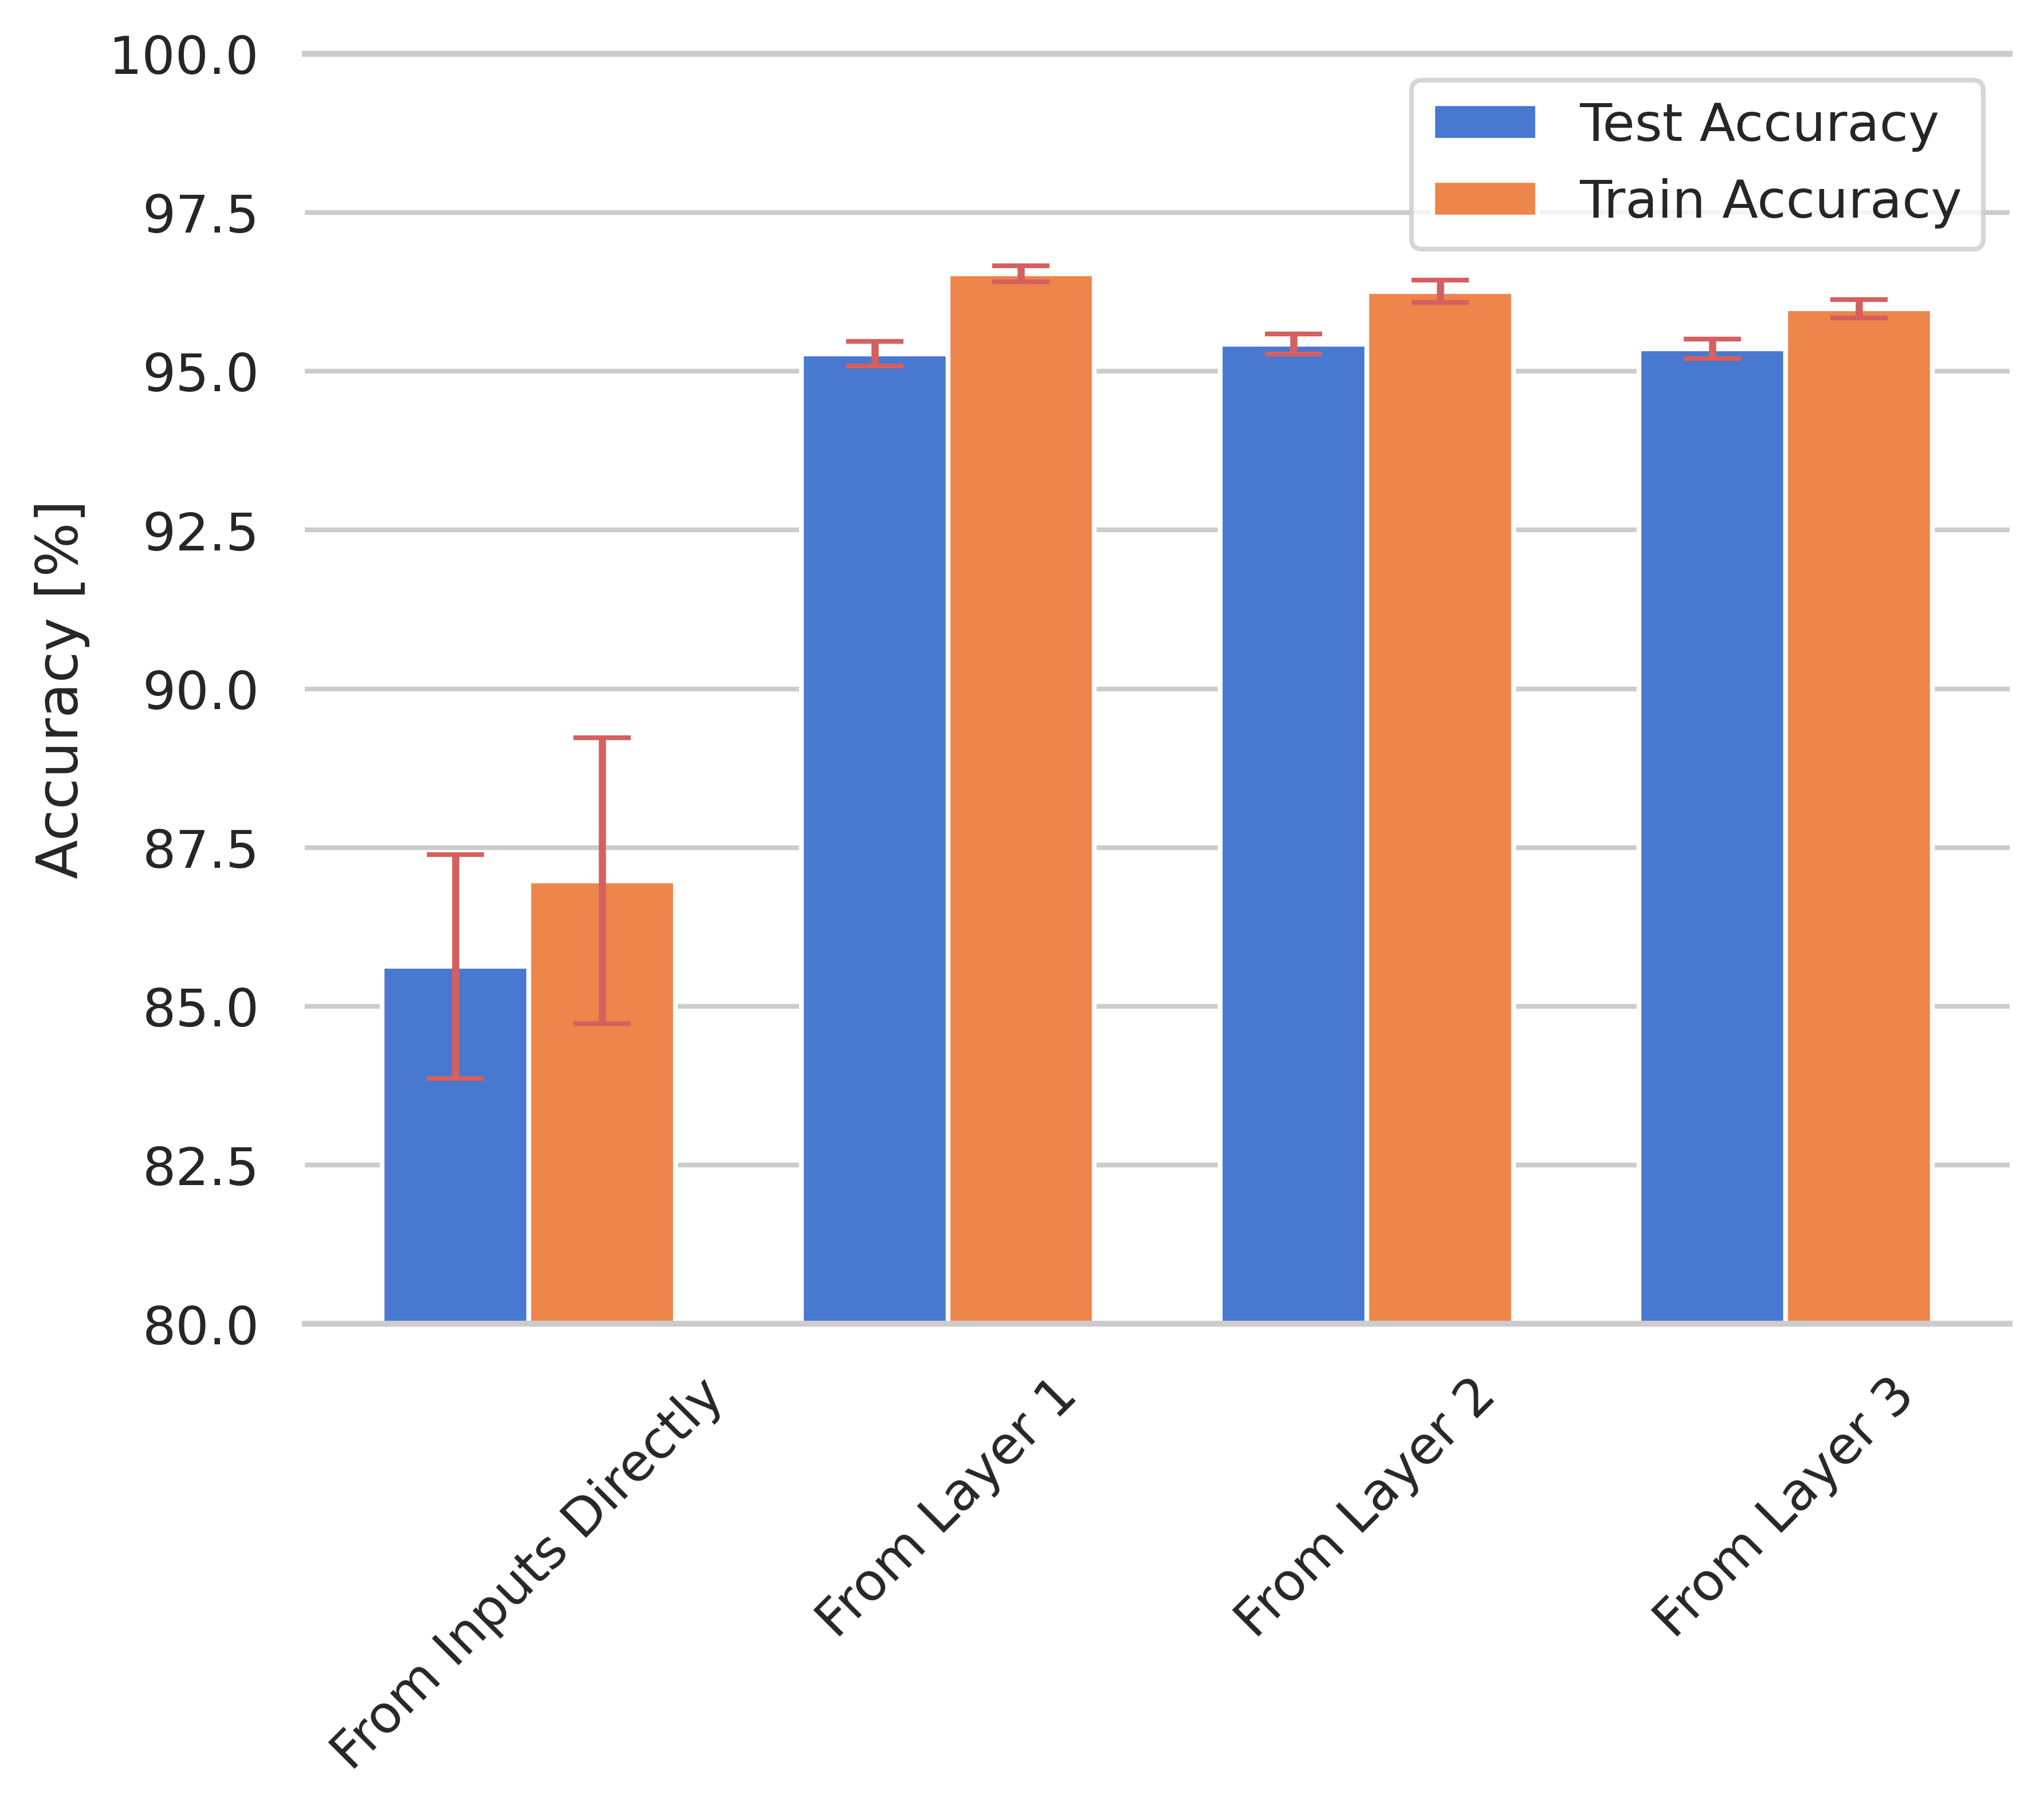

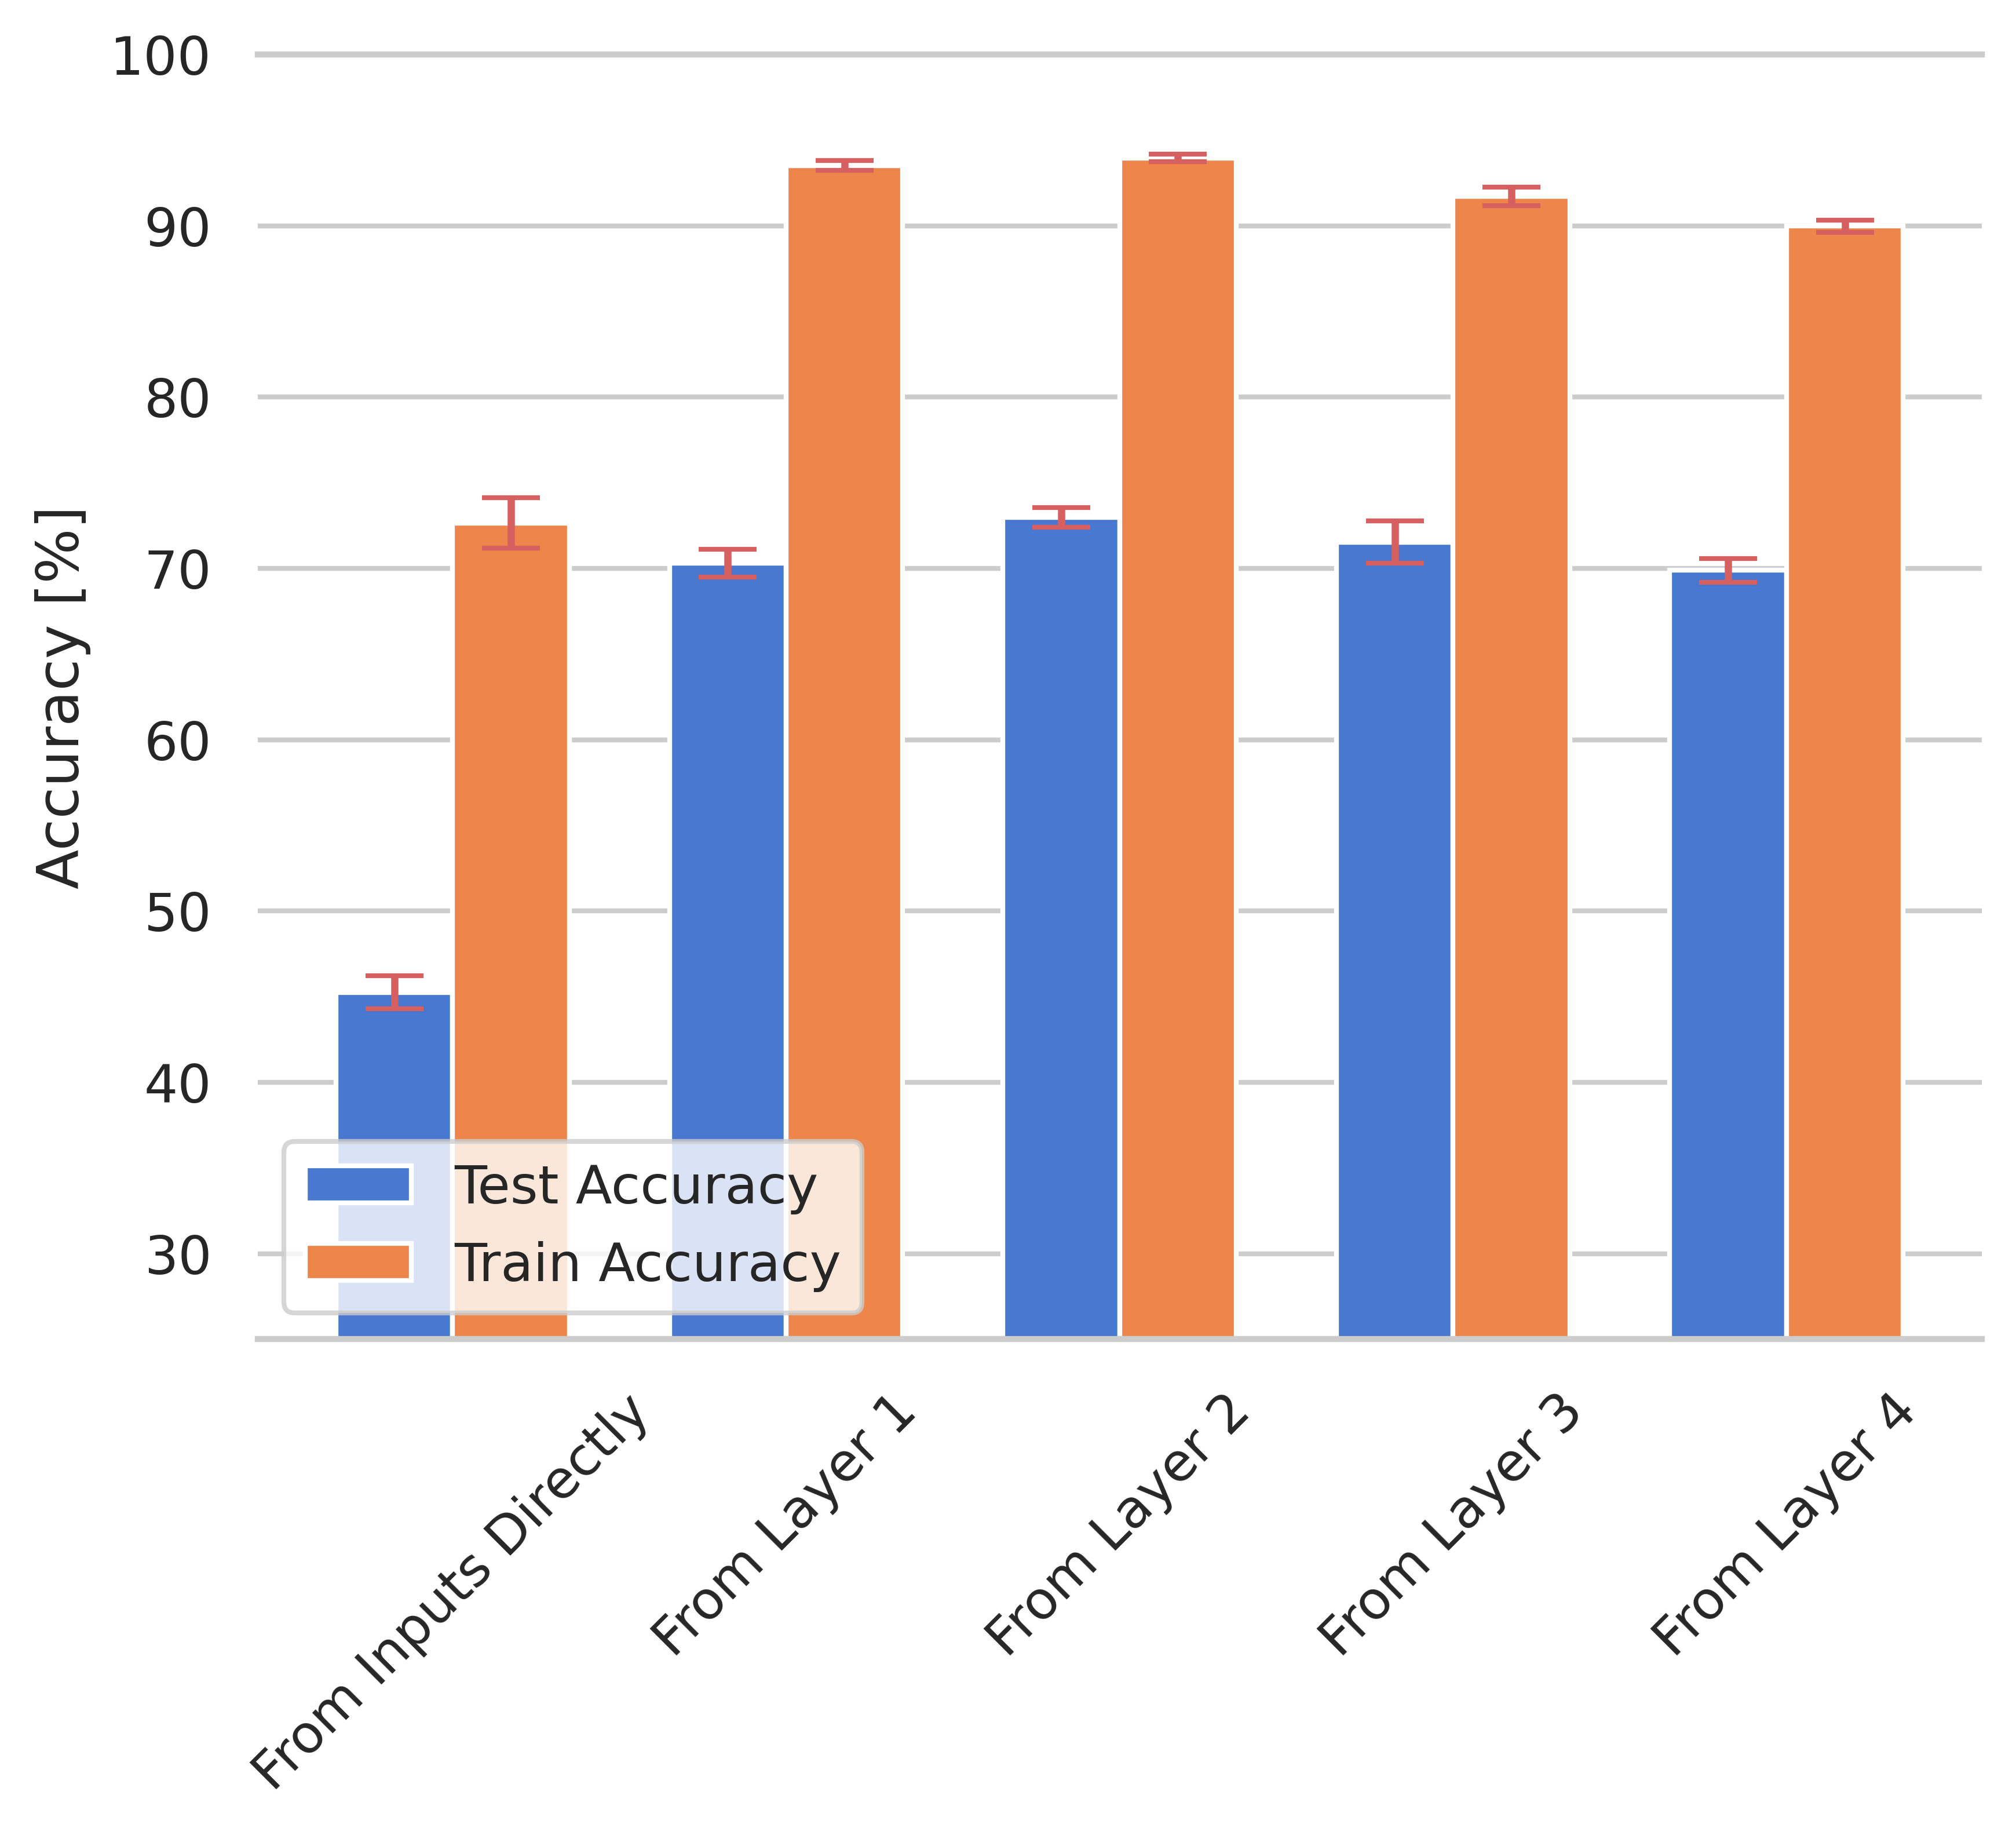

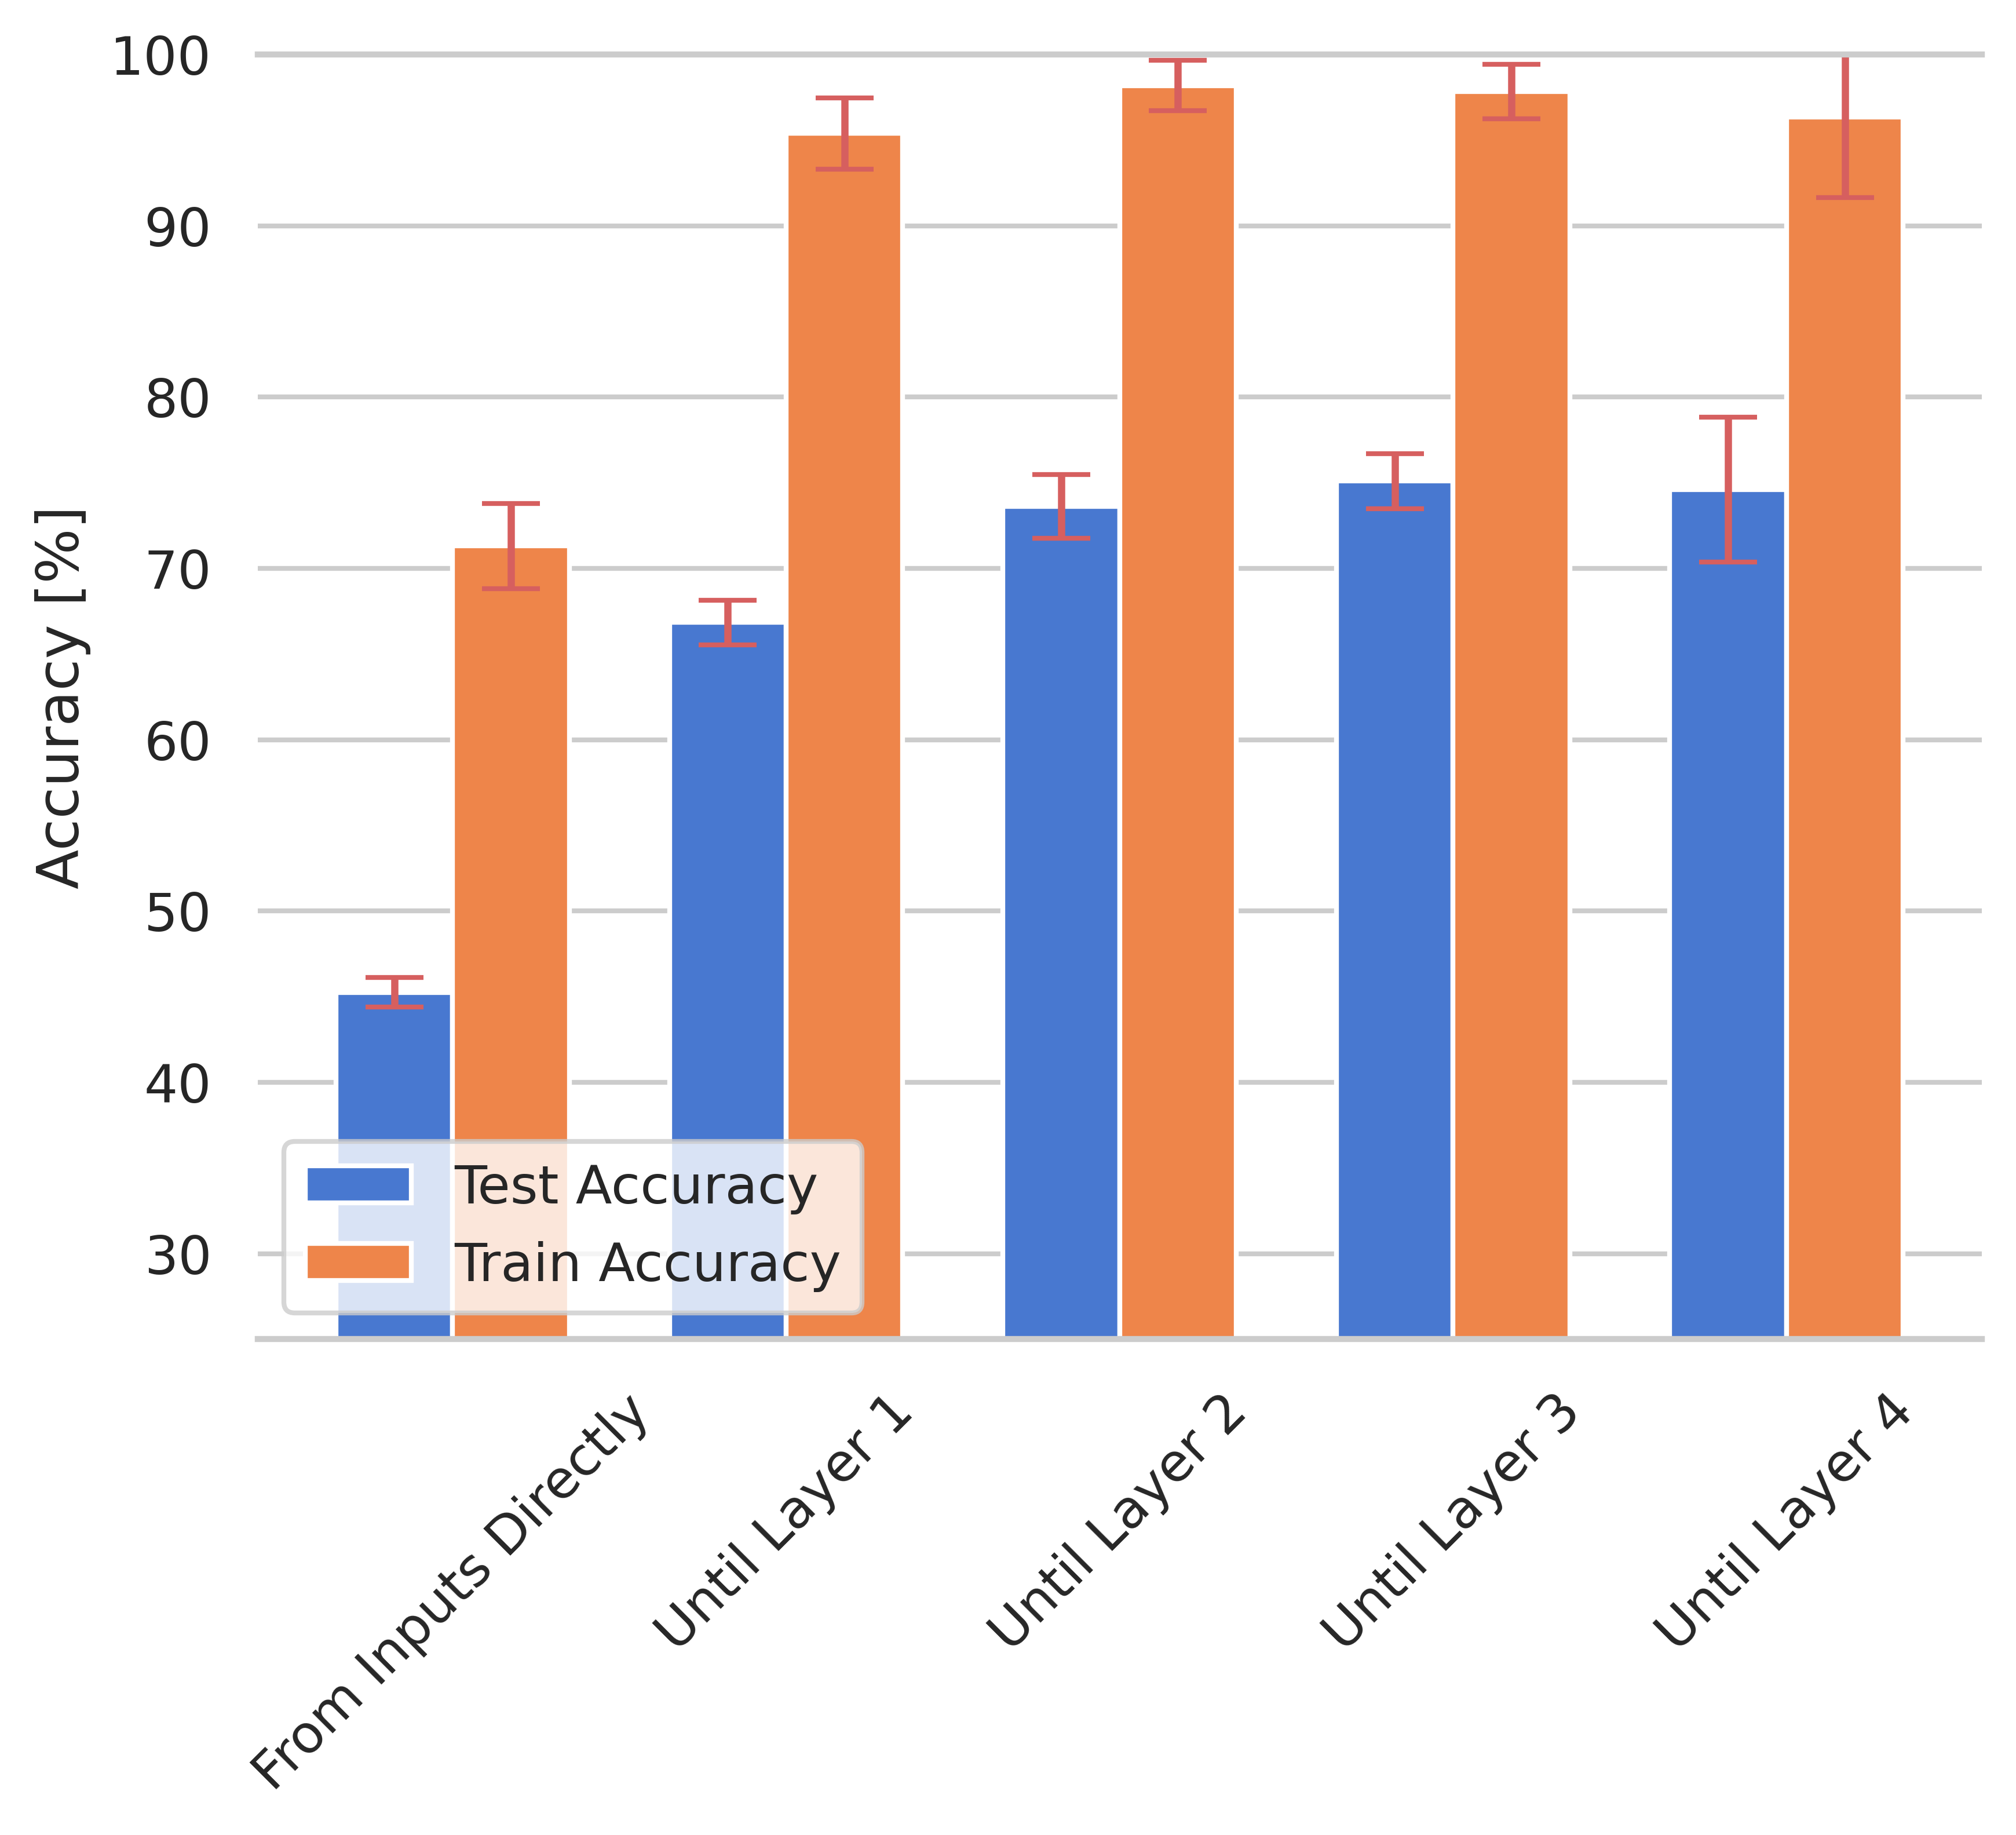

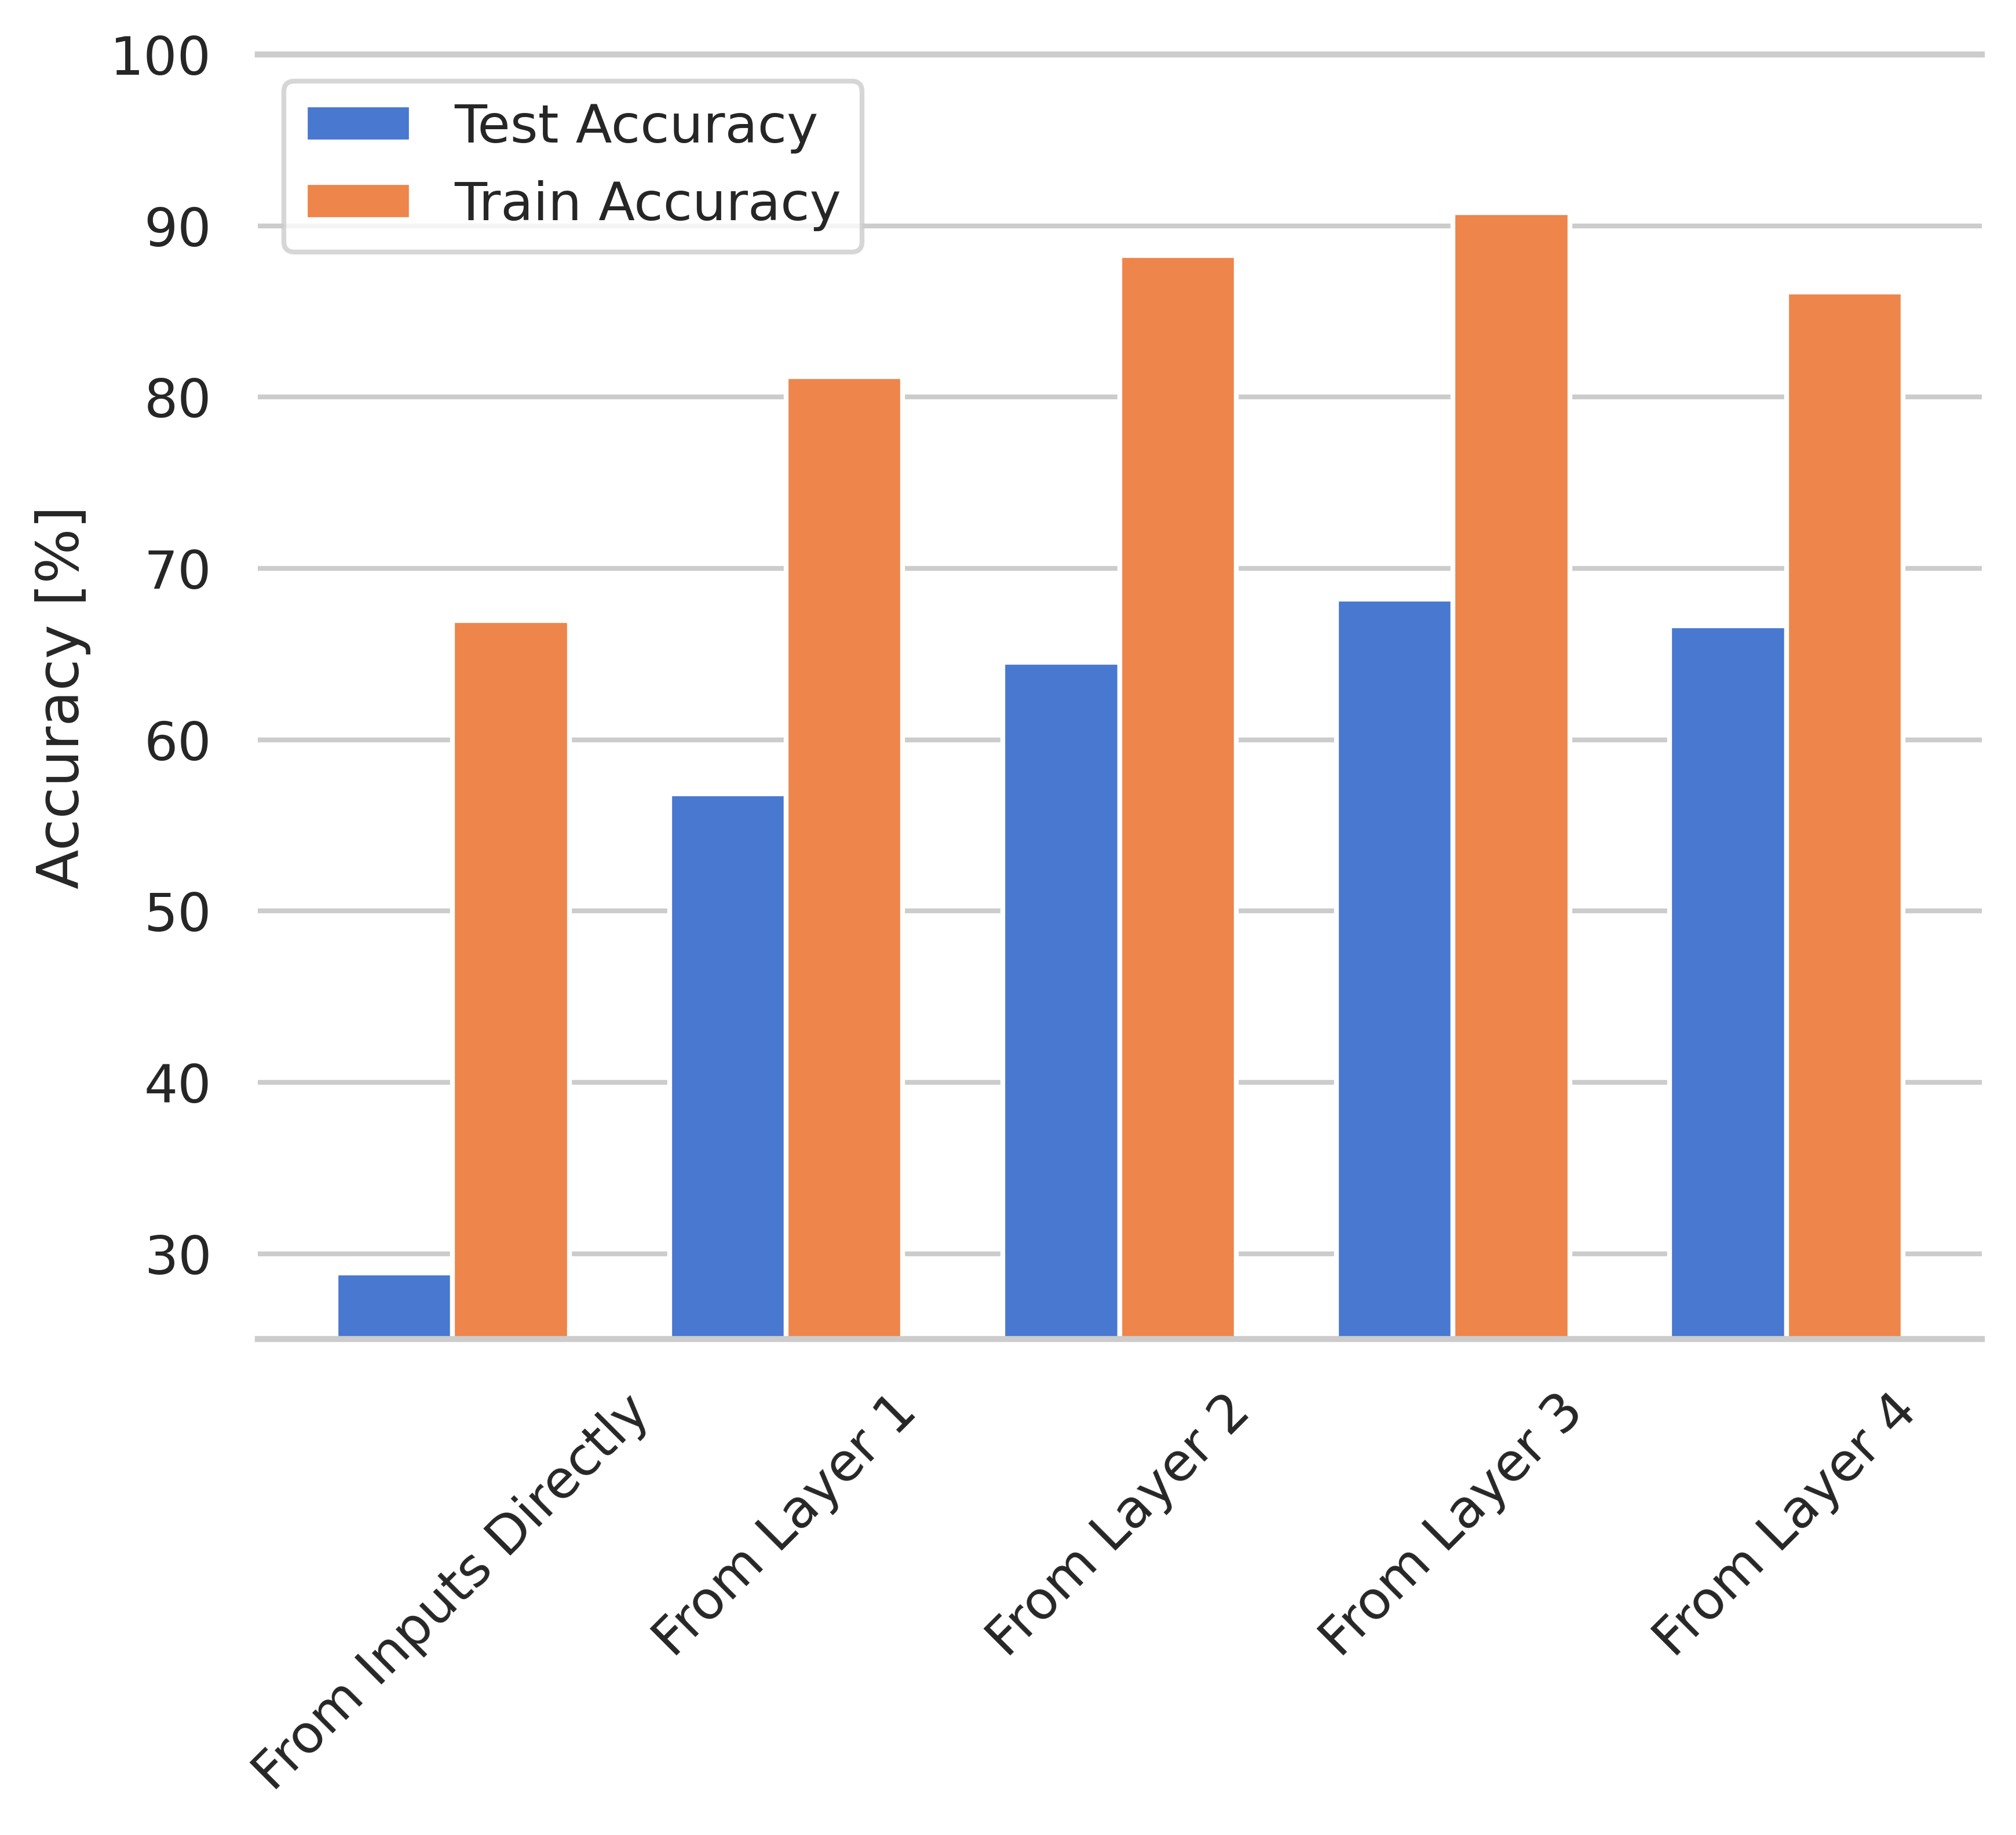

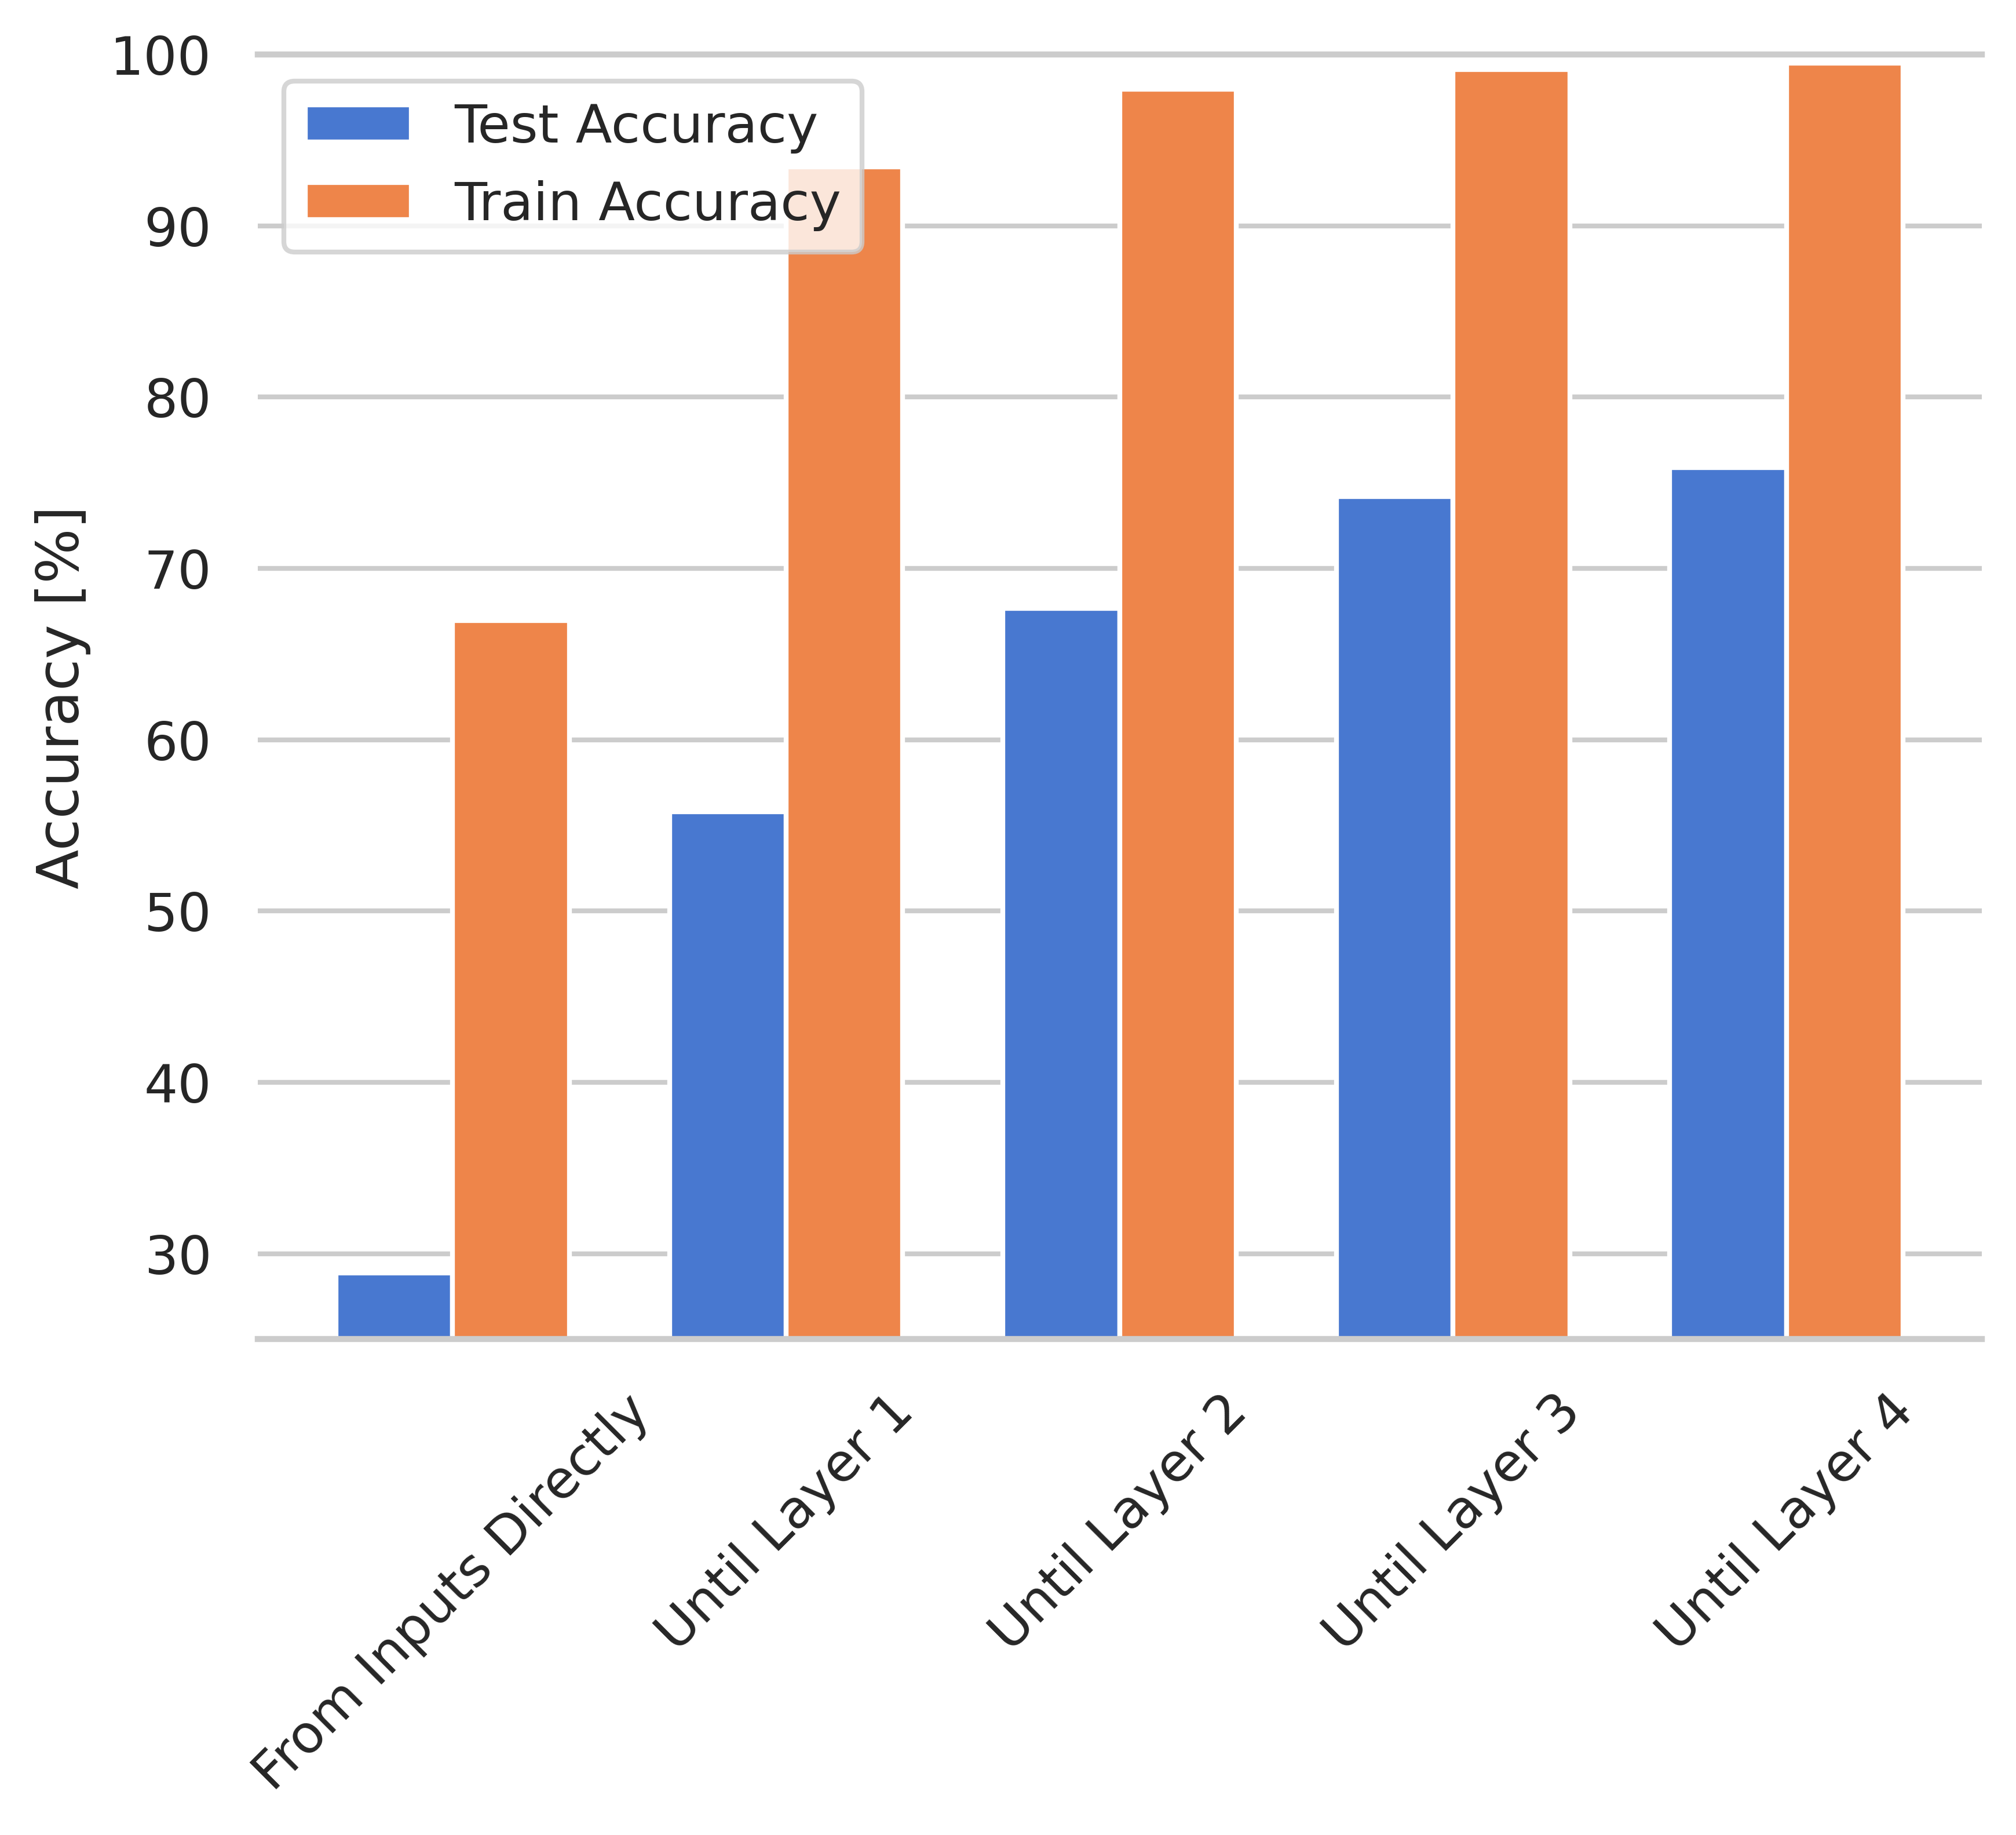

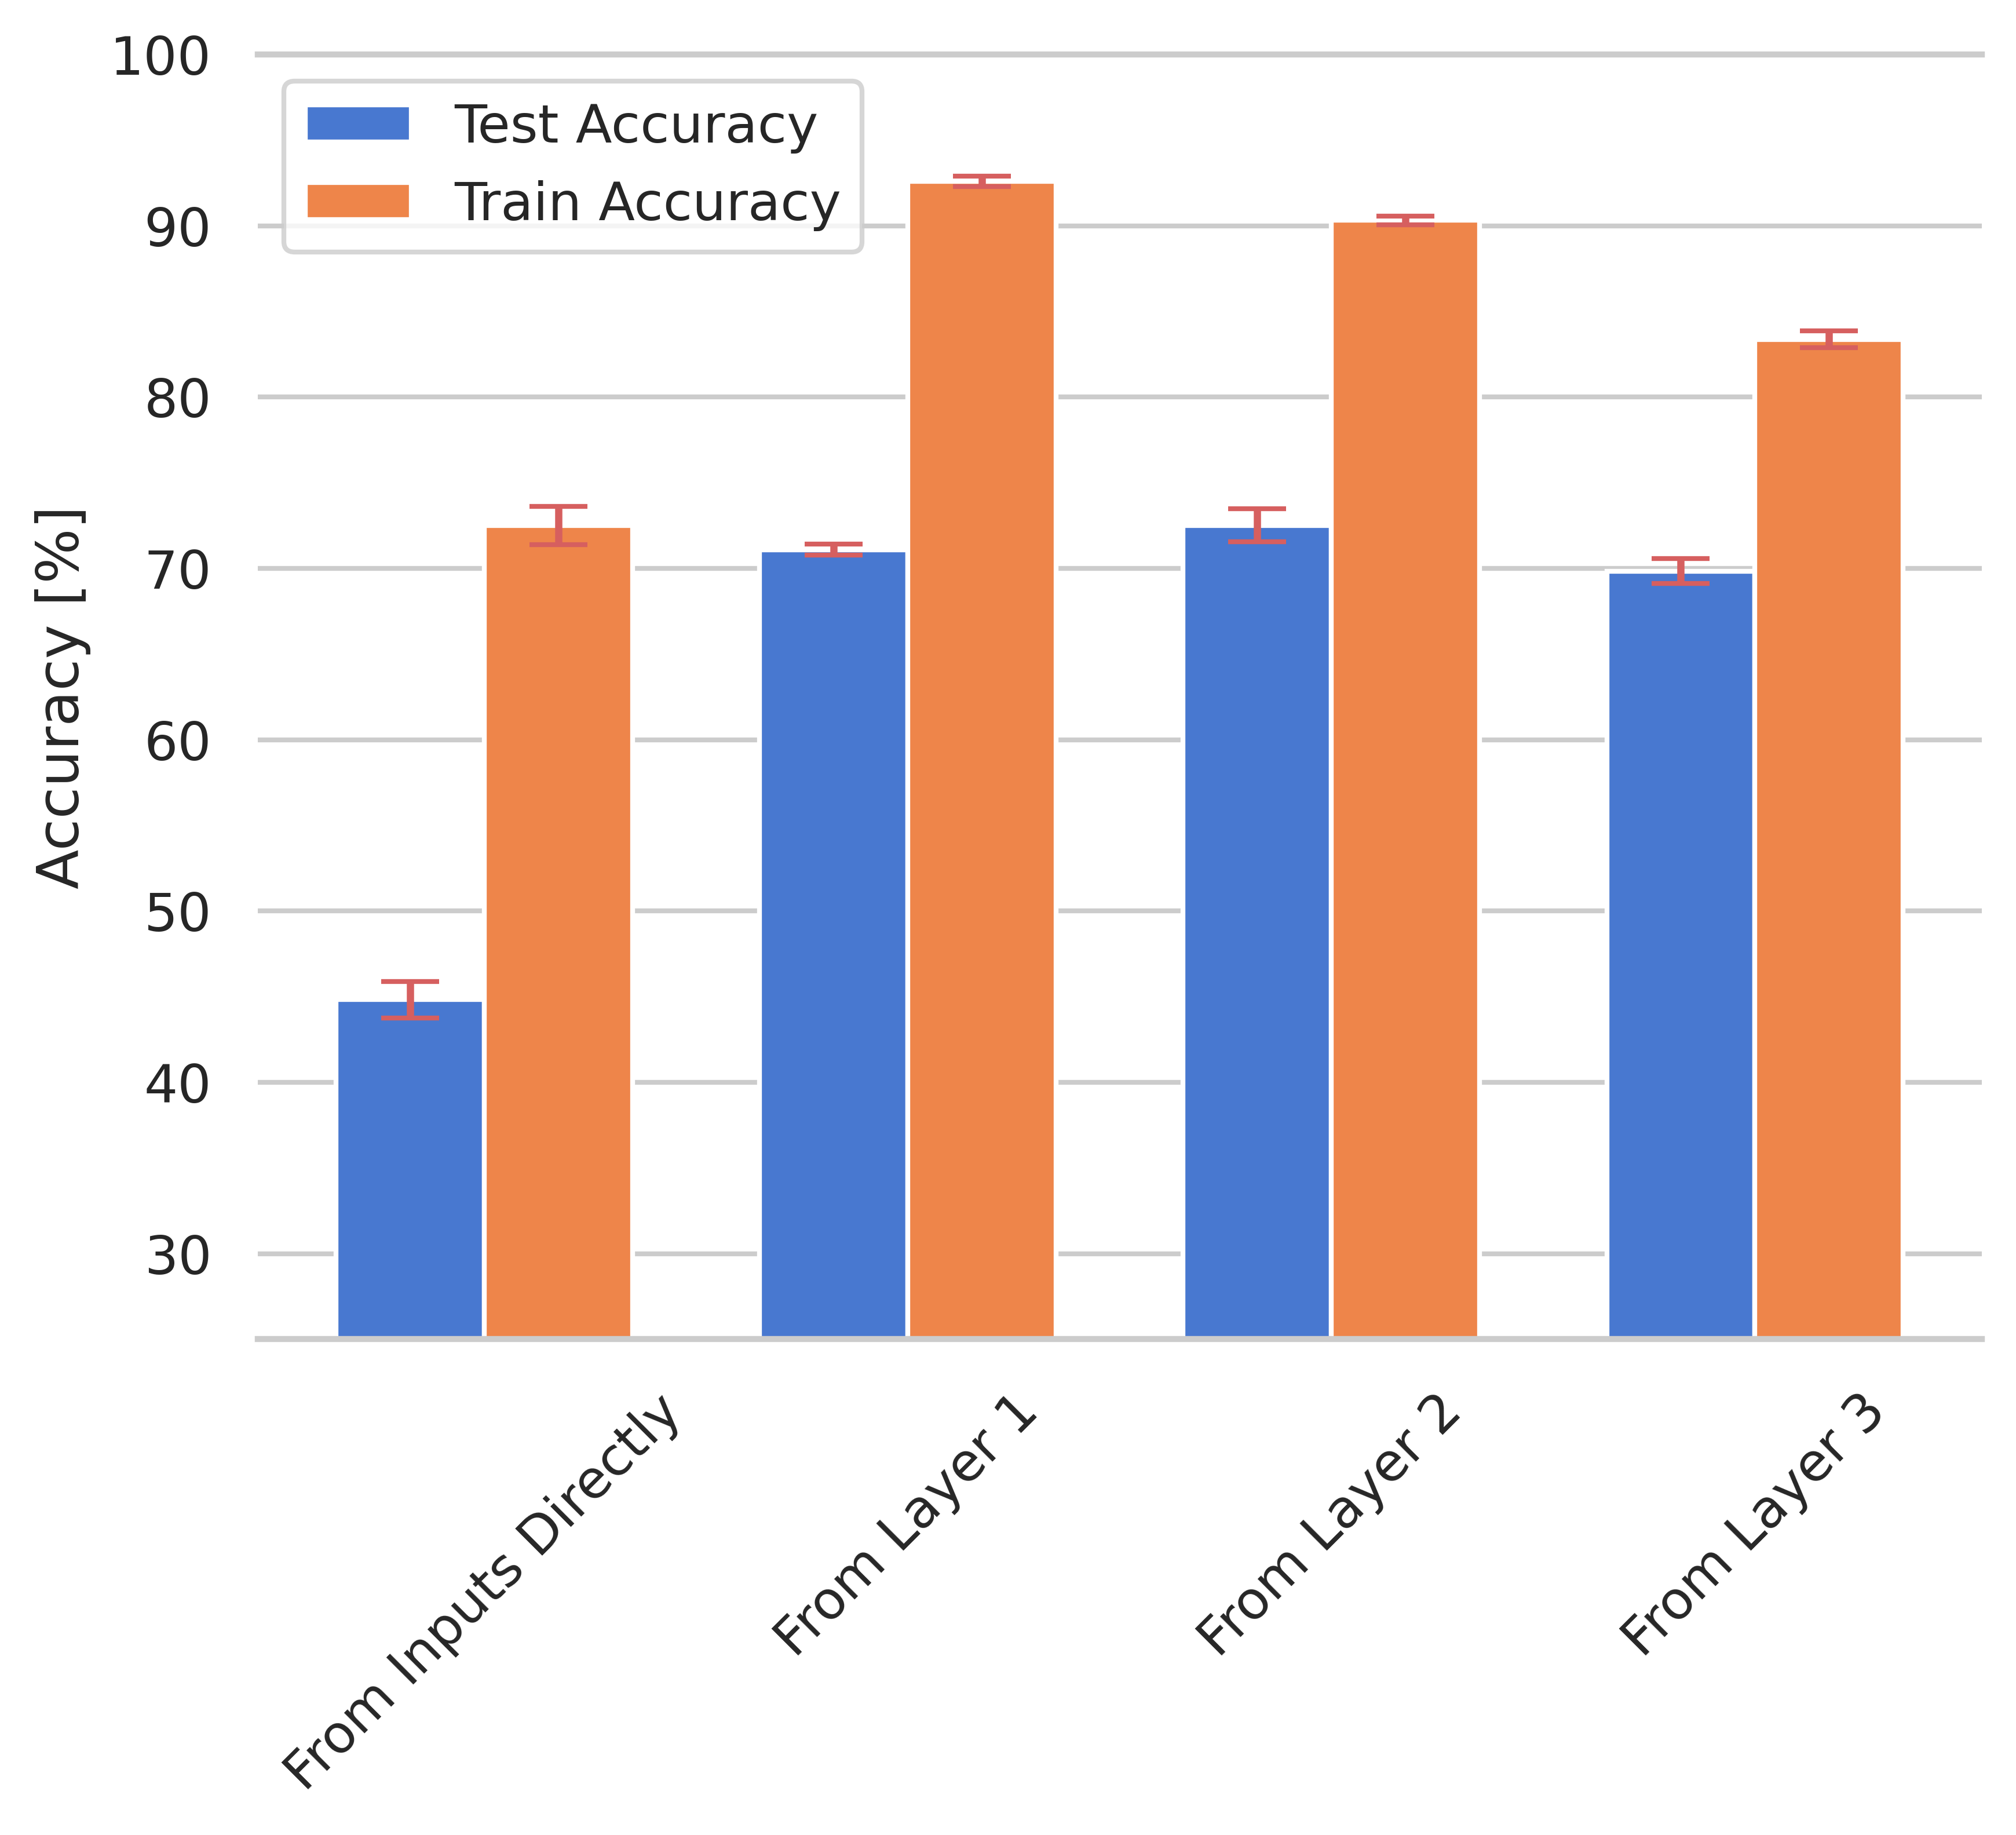

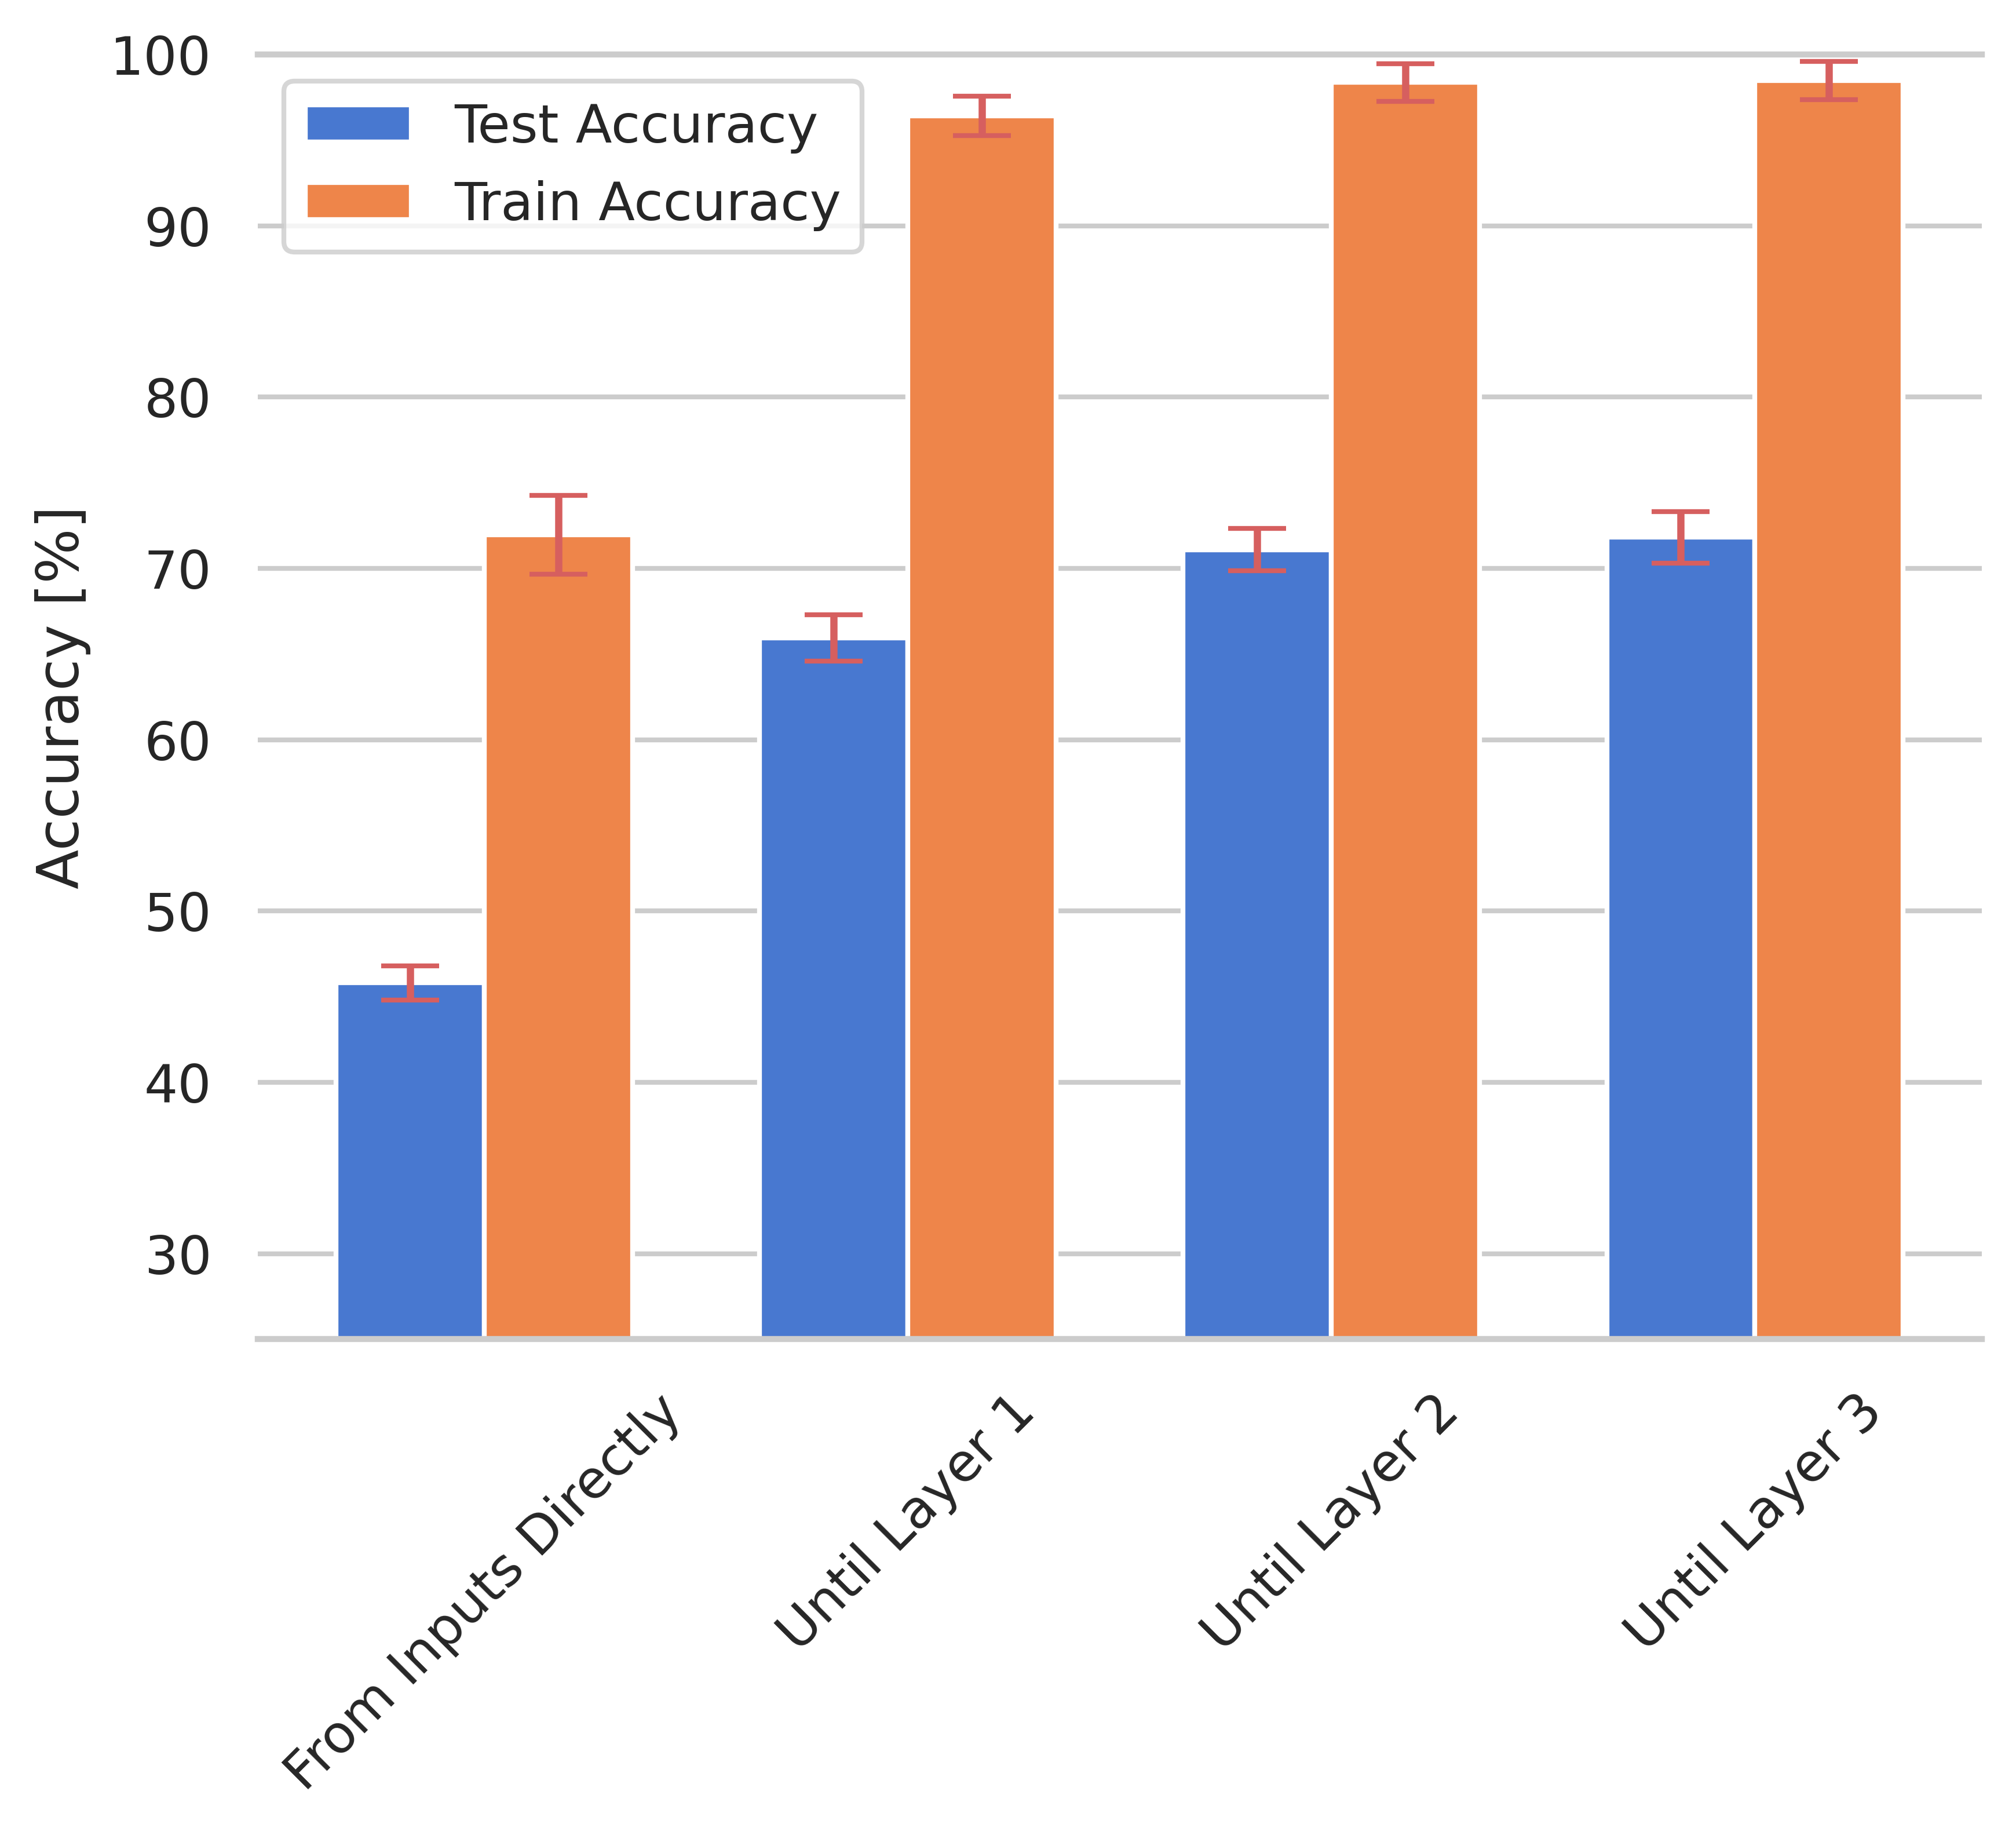

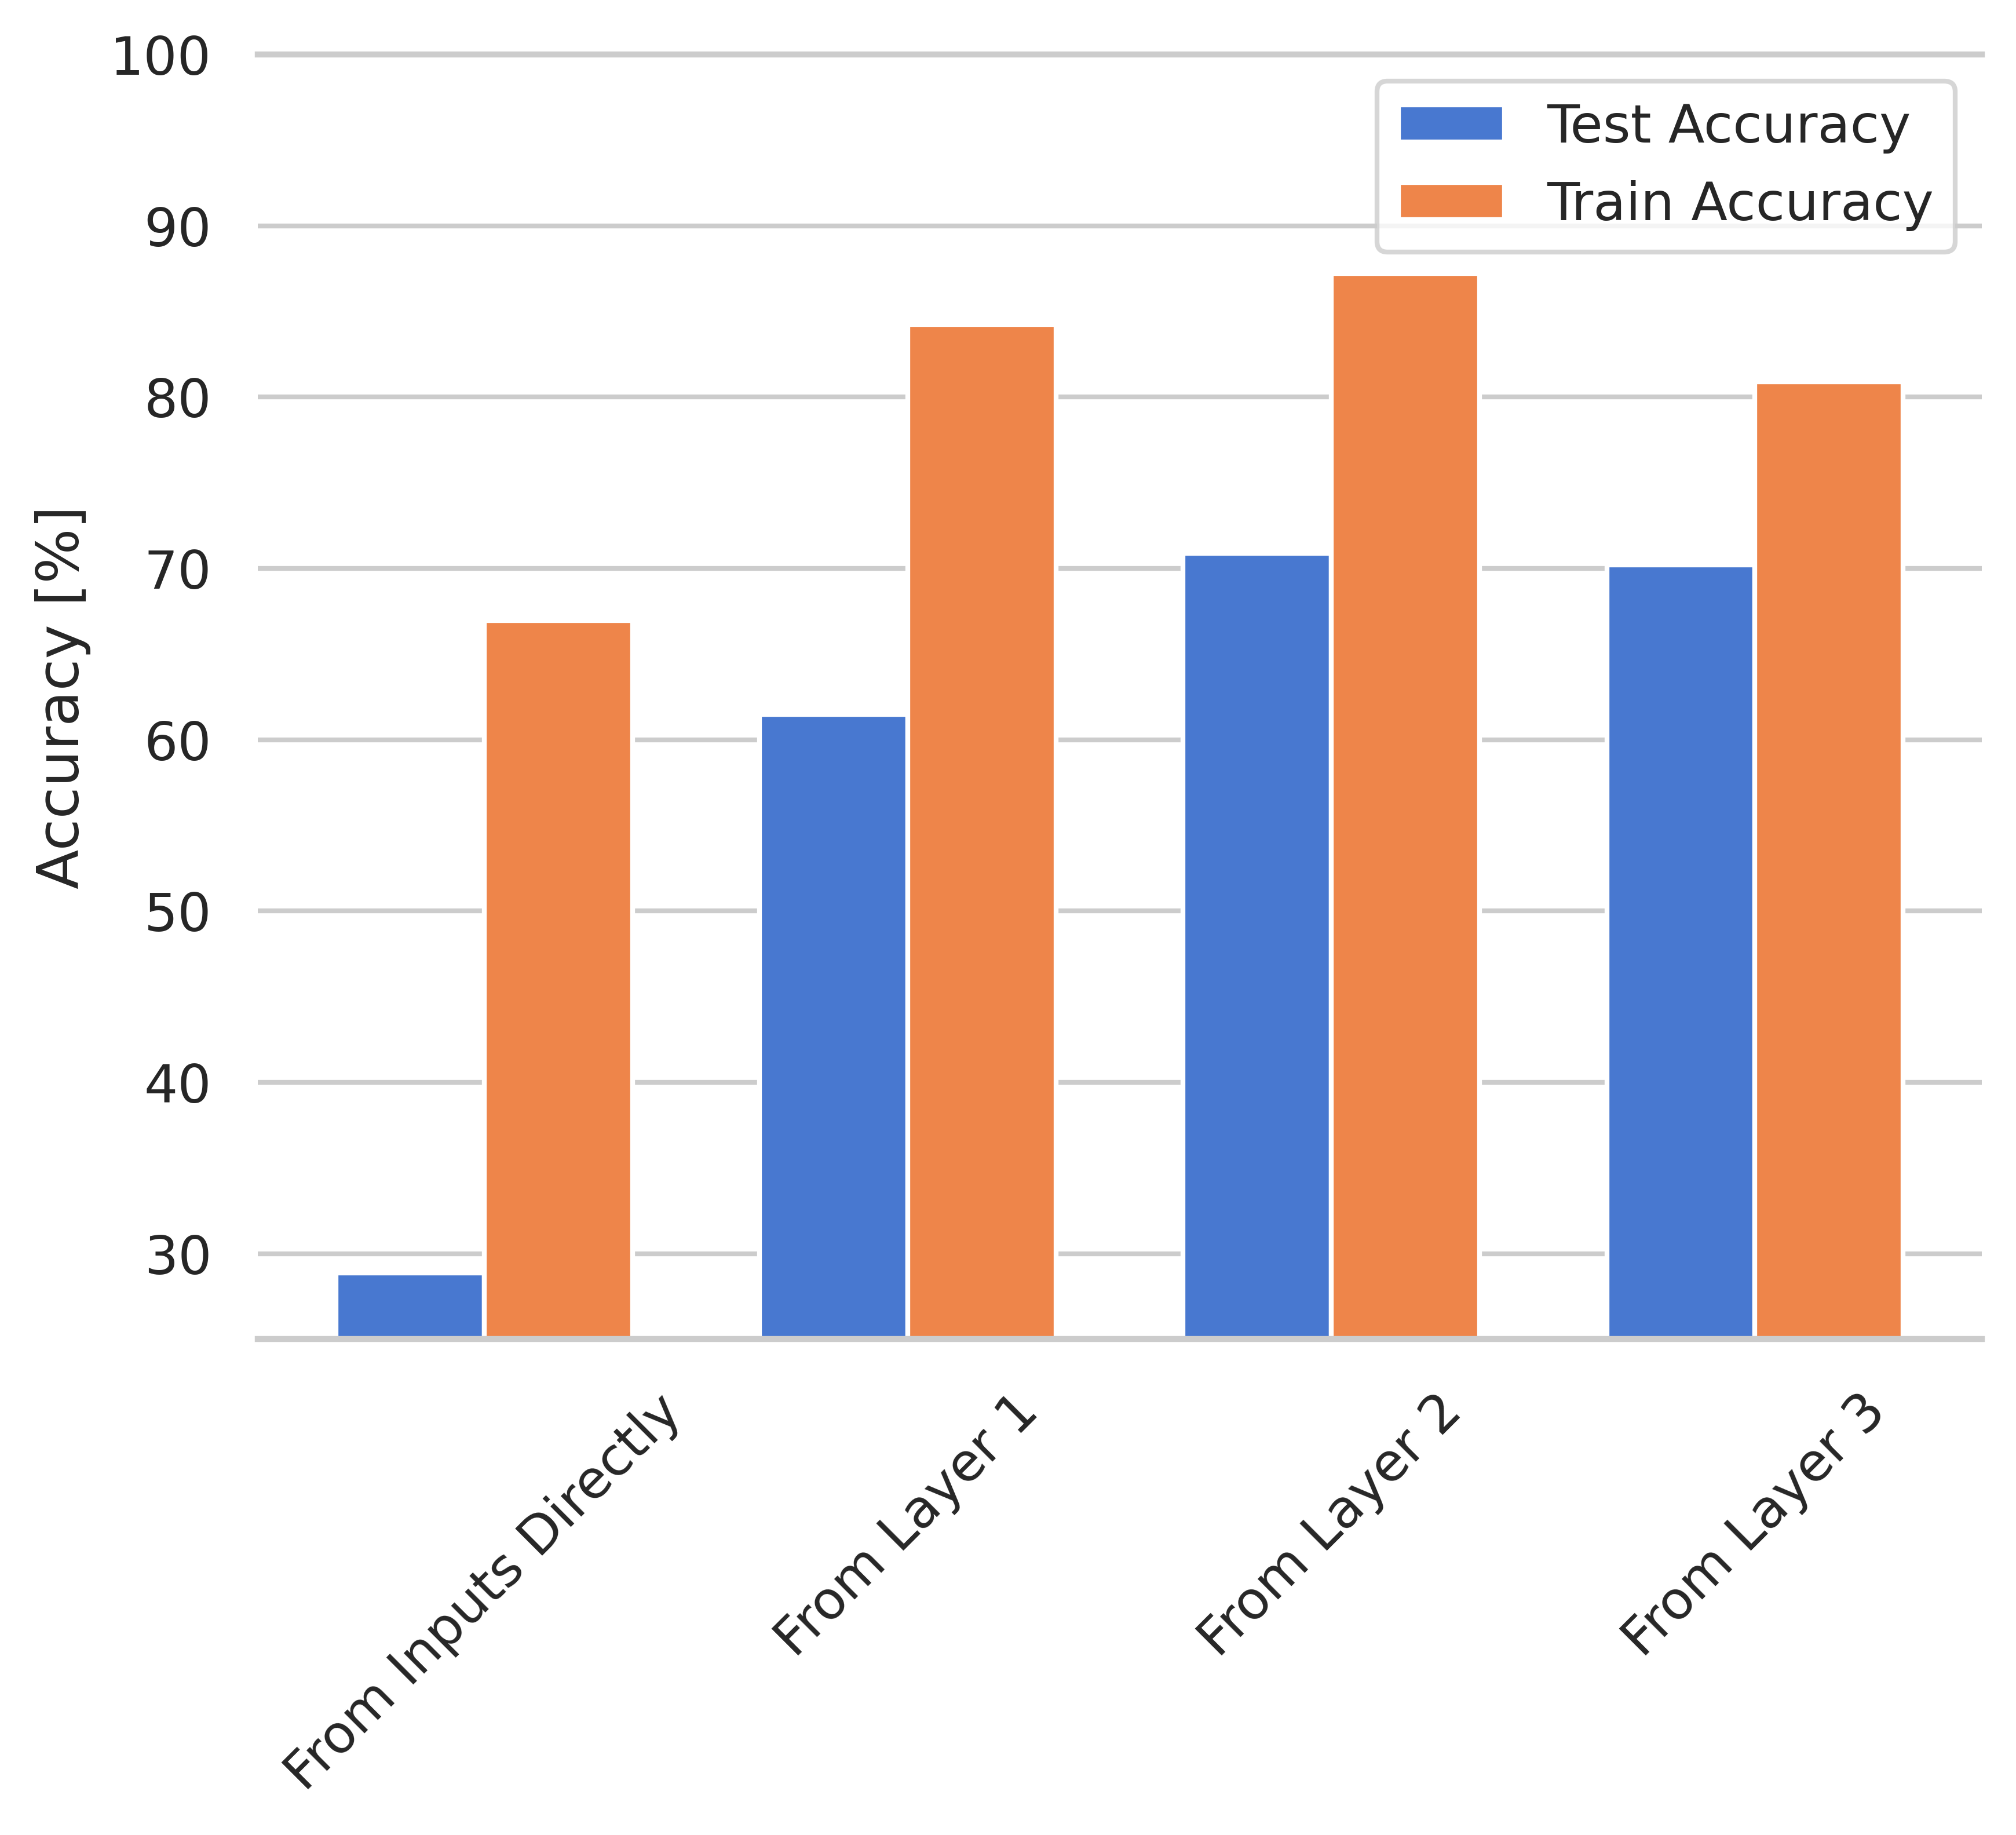

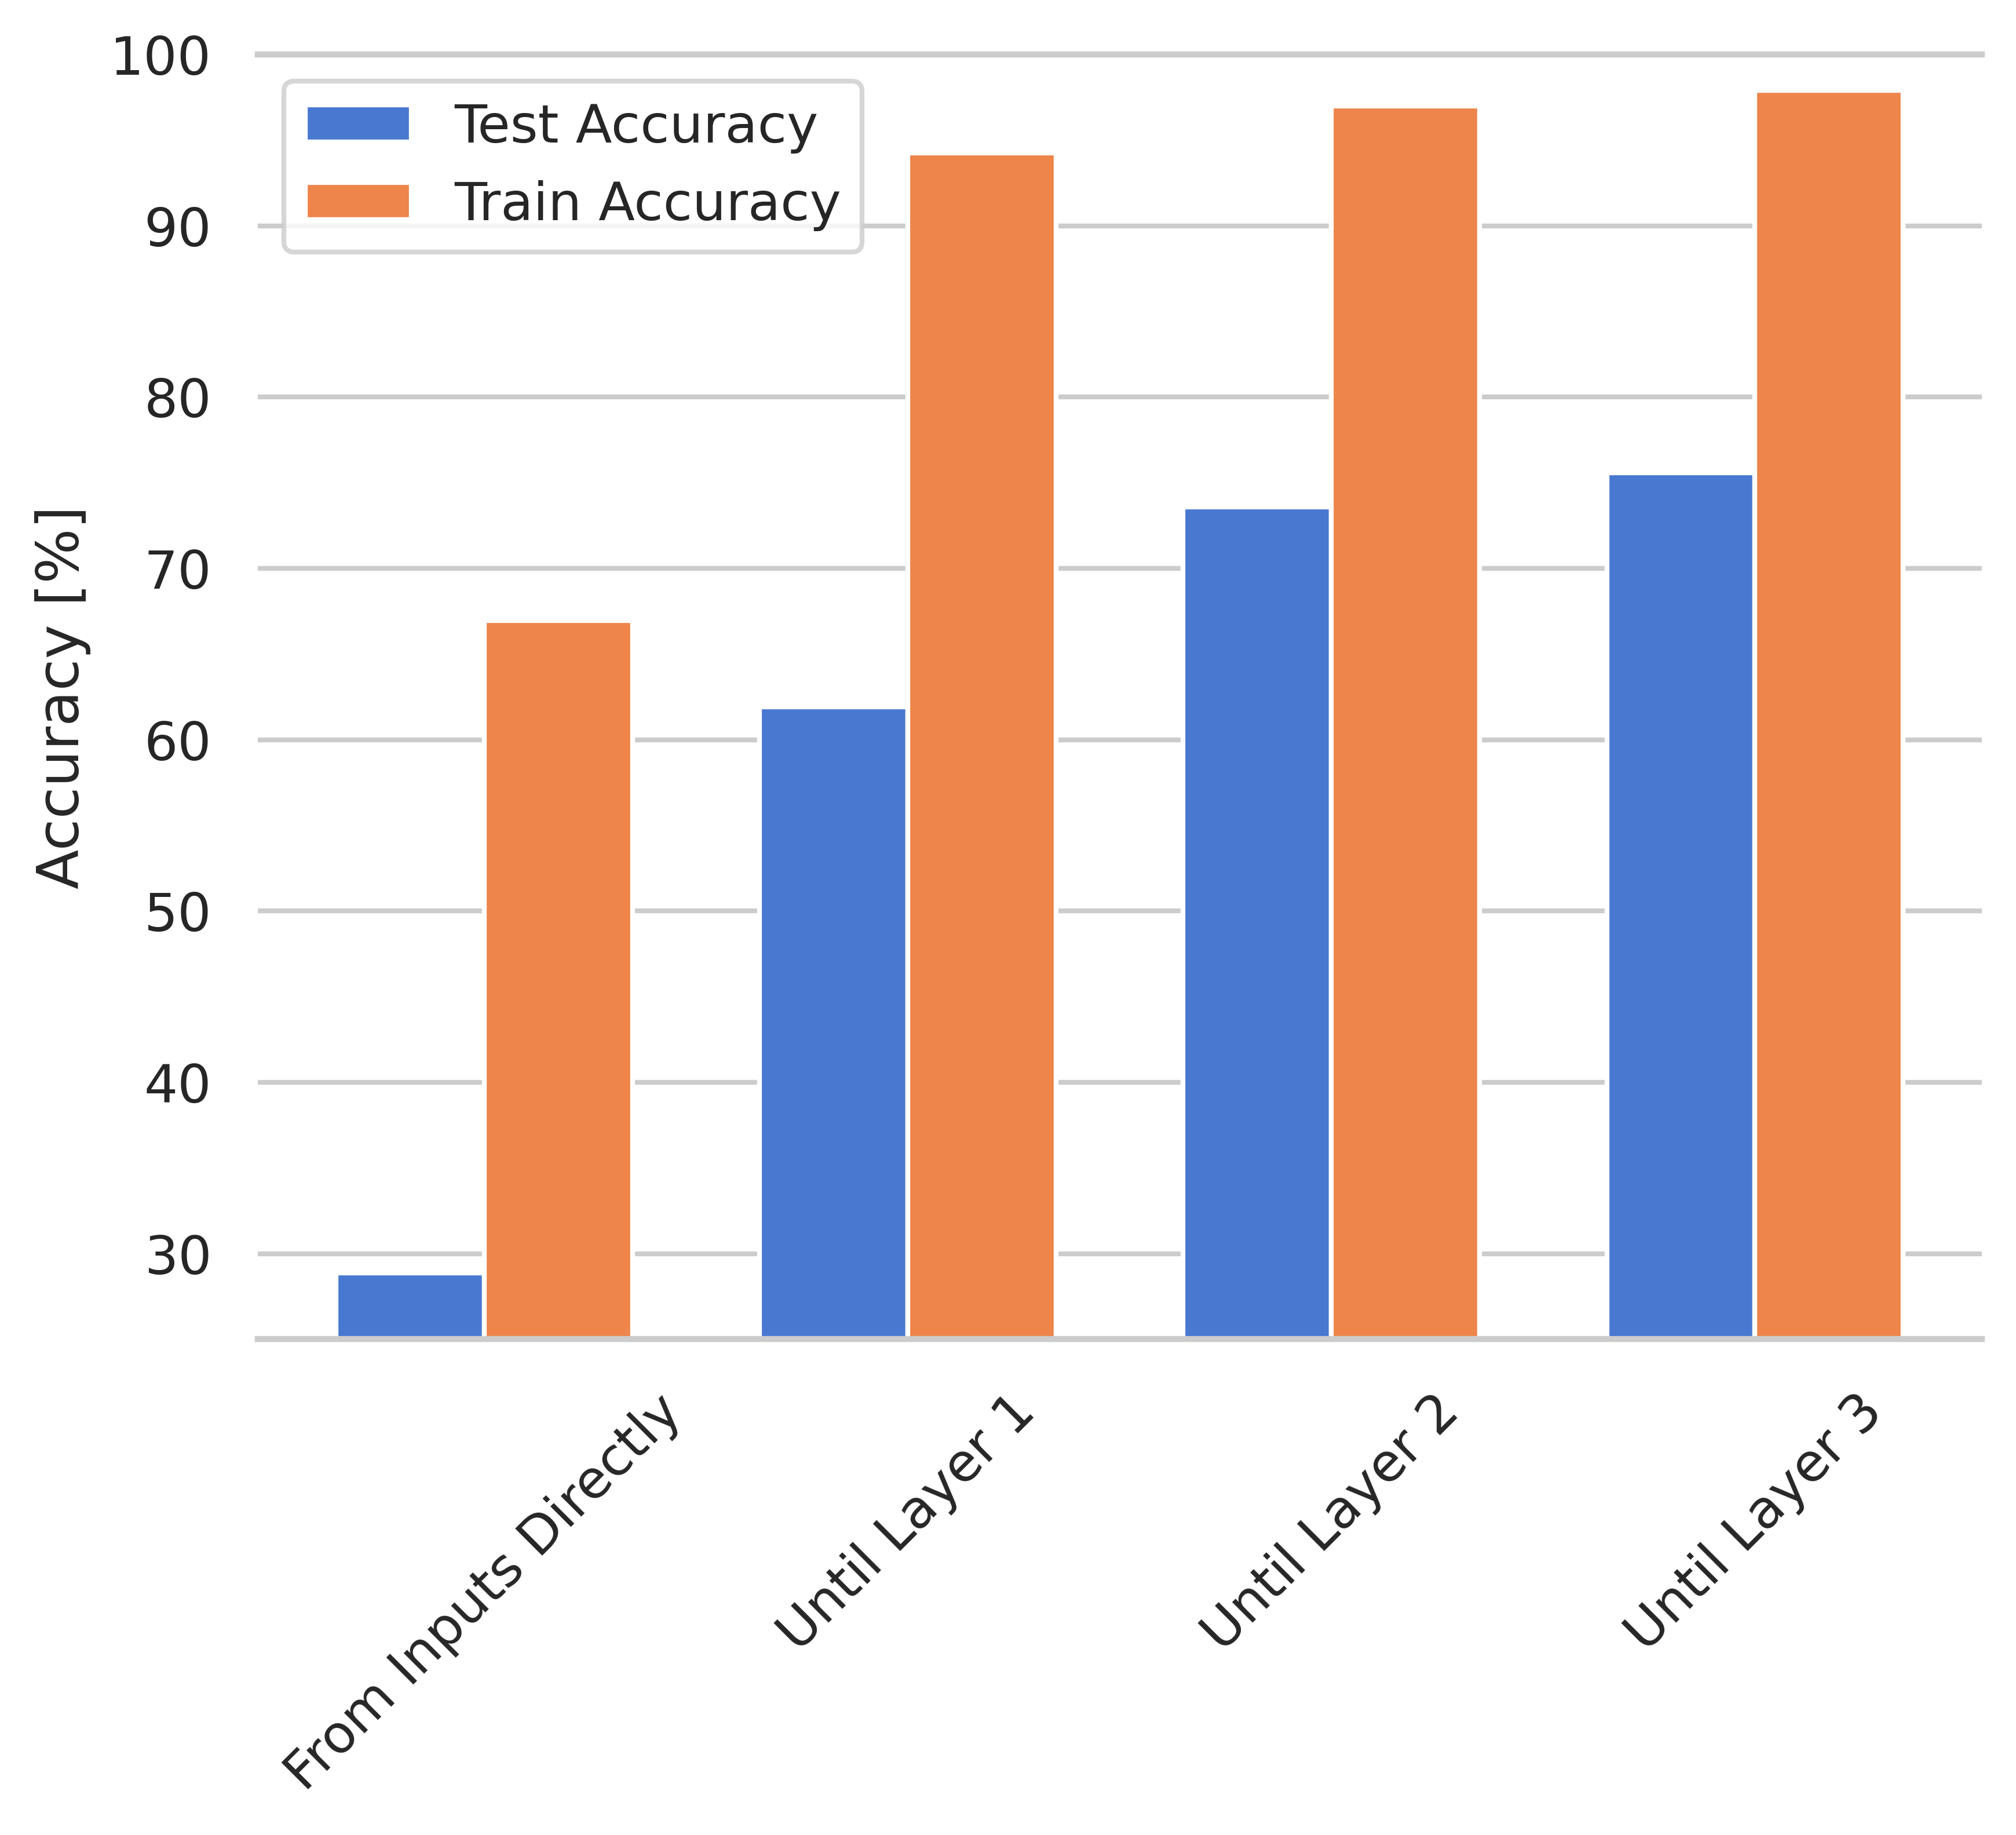

In [24]:
def plot_accuracies(test_accs, train_accs, save_name, ylims, cat, only_one=False):
    # grouped Bar plot the Accuracies of the different layers both during training and testing
    sns.set_theme(style="whitegrid")
    if cat:
        labels = ['From Inputs Directly', *[f'Until Layer {i+1}' for i in range(test_accs.shape[-1]-1)]]
    else: 
        labels = ['From Inputs Directly', *[f'From Layer {i+1}' for i in range(test_accs.shape[-1]-1)]]
    if not only_one:
        print(f'Test Accuracies: {test_accs.mean(axis=0)}', save_name)
    else:
        print(f'Test Accuracies: {test_accs}', save_name)
    x = torch.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    if not only_one:
        print(x.shape, train_accs.mean(axis=0).shape)
        rects1 = ax.bar(x - width/2, 100*test_accs.mean(axis=0), width, label='Test Accuracy', color=color_list[0])
        ax.errorbar(x - width/2, 100*test_accs.mean(axis=0), yerr=100*test_accs.std(axis=0), fmt='none', capsize=6, color=color_list[3])
        rects2 = ax.bar(x + width/2, 100*train_accs.mean(axis=0), width, label='Train Accuracy', color=color_list[1])
        ax.errorbar(x + width/2, 100*train_accs.mean(axis=0), yerr=100*train_accs.std(axis=0), fmt='none', capsize=6, color=color_list[3])
    else:
        print(x.shape, train_accs.shape)
        rects1 = ax.bar(x - width/2, 100*test_accs, width, label='Test Accuracy', color=color_list[0])
        rects2 = ax.bar(x + width/2, 100*train_accs, width, label='Train Accuracy', color=color_list[1])
    # remove horizontal lines and spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.grid(False)
    plt.xticks(np.arange(test_accs.shape[-1]), labels, rotation=45)
    plt.legend()
    plt.ylabel('Accuracy [%]')
    plt.ylim(ylims)
    # save the figure
    plt.savefig('final_results/' + save_name + '.png', bbox_inches='tight')

for i, model_name in enumerate(model_names):
    if 'mnist' in model_name:
        ylims = [80, 100]
    else:
        ylims = [25, 100]
    test_accs = results[i]['test']
    train_accs = results[i]['train']
    plot_accuracies(test_accs, train_accs, save_names[i] + '_accuracies', ylims, False)
    if 'train_cat' in results[i].keys():
        test_accs = results[i]['test_cat']
        train_accs = results[i]['train_cat']
        plot_accuracies(test_accs, train_accs, save_names[i] + '_cat_accuracies', ylims, True)
    if 'train_closed' in results[i].keys():
        test_accs = torch.tensor(results[i]['test_closed'])
        train_accs = torch.tensor(results[i]['train_closed'])
        plot_accuracies(test_accs, train_accs, save_names[i] + '_closed_accuracies', ylims, False, only_one=True)
        test_accs = torch.tensor(results[i]['test_closed_cat'])
        train_accs = torch.tensor(results[i]['train_closed_cat'])
        plot_accuracies(test_accs, train_accs, save_names[i] + '_closed_cat_accuracies', ylims, True, only_one=True)
    if 'fewshot' in results[i].keys():
        fewshot_accuracies = results[i]['fewshot']